In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\drang\Documents\kaggle modelling\archive\prices.csv", index_col='date', parse_dates=True)
data.head()
#print(data["symbol"].sum())

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
print(data["symbol"].mode())

0         A
1       AAL
2       AAP
3      AAPL
4       ABC
       ... 
462     XRX
463    YHOO
464     YUM
465     ZBH
466    ZION
Name: symbol, Length: 467, dtype: object


Text(0.5, 1.0, 'New York stock prices change')

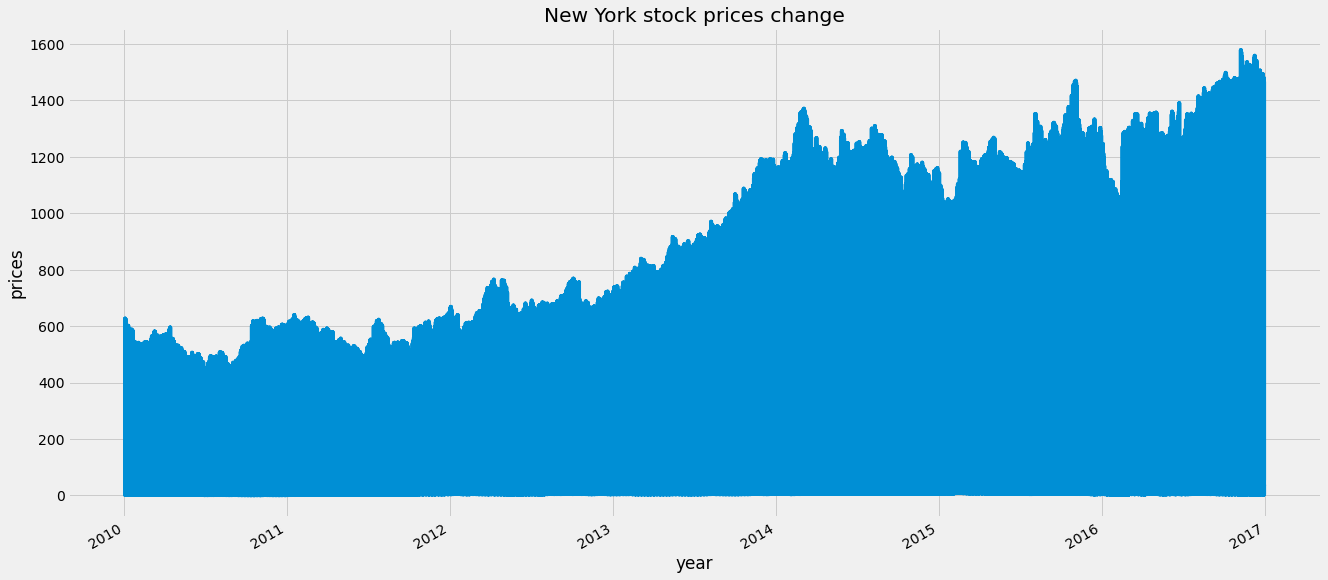

In [4]:
#timeseries data and ml
plt.style.use("fivethirtyeight")
fig1, ax1 = plt.subplots()
data['close'].plot(ax =ax1, figsize=(20,10))
plt.xlabel("year")
plt.ylabel("prices")
plt.title('New York stock prices change')


In [5]:
#dtype and index type convert
data.dtypes
data.index = pd.to_datetime(data.index)

In [6]:
#a, b, c, d= data["close"].where(data["symbol"]=="YHOO"), data["close"].where(data["symbol"]=="EBAY")
X = 0
X = pd.DataFrame(columns=['EBAY', 'NVDA', 'AAPL'])
y = pd.DataFrame(columns=['AAPL'])
for i in ['EBAY', 'NVDA', 'YHOO']:
    
        a = 0
        a = (data["close"].where(data["symbol"]==i)).dropna()
        #print(a)
        X[i] = a
    
y['AAPL'] = (data["close"].where(data["symbol"]==i)).dropna()
#b = data.loc(data['close']!=np.nan)
#a.dropna(inplace = True)
#b.dropna(inplace = True)
X.drop(columns='AAPL', inplace=True)
print(X.head, y.head)

<bound method NDFrame.head of                  EBAY        NVDA       YHOO
date                                        
2010-01-04  23.900000   18.490000  17.100000
2010-01-05  23.650000   18.760000  17.230000
2010-01-06  23.500000   18.879999  17.170000
2010-01-07  23.229998   18.510000  16.700001
2010-01-08  23.509999   18.549999  16.700001
...               ...         ...        ...
2016-12-23  29.790001  109.779999  38.660000
2016-12-27  30.240000  117.320000  38.919998
2016-12-28  30.010000  109.250000  38.730000
2016-12-29  29.980000  111.430000  38.639999
2016-12-30  29.690001  106.739998  38.669998

[1762 rows x 3 columns]> <bound method NDFrame.head of                  AAPL
date                 
2010-01-04  17.100000
2010-01-05  17.230000
2010-01-06  17.170000
2010-01-07  16.700001
2010-01-08  16.700001
...               ...
2016-12-23  38.660000
2016-12-27  38.919998
2016-12-28  38.730000
2016-12-29  38.639999
2016-12-30  38.669998

[1762 rows x 1 columns]>


Text(0.5, 0, 'ebay')

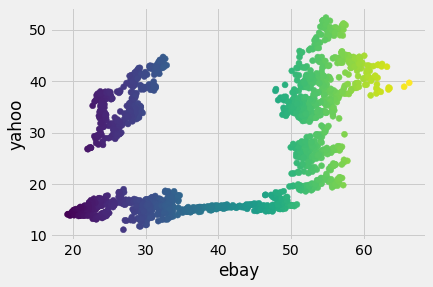

In [7]:
#data.plot.scatter(data.where(data["symbol"]=="YHOO"), data.where(data["symbol"]=="EBAY"))
plt.scatter(X['EBAY'].to_numpy(), X['YHOO'].to_numpy(), c = X['EBAY'], cmap=plt.cm.viridis)
plt.ylabel("yahoo")
plt.xlabel("ebay")

In [8]:
X.describe()

,EBAY,NVDA,YHOO
count,1762.000000,1762.000000,1762.000000
mean,39.440572,22.034557,27.291992
std,12.990586,15.907978,11.406846
min,19.260000,8.880000,11.090000
25%,28.322500,14.010000,15.920000
50%,33.554998,16.985000,26.750000
75%,52.774997,21.832500,37.377500
max,66.289998,117.320000,52.369999


In [9]:
X.info(), y.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EBAY    1762 non-null   float64
 1   NVDA    1762 non-null   float64
 2   YHOO    1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB


(None,
               AAPL
 count  1762.000000
 mean     27.291992
 std      11.406846
 min      11.090000
 25%      15.920000
 50%      26.750000
 75%      37.377500
 max      52.369999)

In [10]:
#pp
from sklearn import preprocessing as pp
p = pp.StandardScaler().fit(X)
X = p.transform(X)
print(p.mean_)


[39.4405722  22.03455732 27.29199203]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=1)

In [43]:
#y = pp.StandardScaler().fit_transform(X)
z = y.to_dict("list")
ml_predic = pd.DataFrame(columns=["y_true"], data = y_test.values)
ml_predic.head

<bound method NDFrame.head of         y_true
0    37.150002
1    36.029999
2    34.490002
3    35.930000
4    36.240002
..         ...
348  38.660000
349  38.919998
350  38.730000
351  38.639999
352  38.669998

[353 rows x 1 columns]>

In [45]:
from sklearn.linear_model import Ridge, SGDRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import r2_score

l = [Ridge() , SGDRegressor(), XGBRegressor()]
 
kf = KFold(n_splits=10) 
#ml_predic.to_frame(name=None)
mla_cols= ["mla name", "train_score", "test_score", "fit_time"]
ml = pd.DataFrame(columns=mla_cols)
row_indx = 0
for alg in l:
    mla_name = alg.__class__.__name__
    ml.loc[row_indx, "mla name"] = mla_name
    cv_res = cross_validate(alg, X, y, cv=kf, return_train_score=True)
    ml.loc[row_indx, "train_score"] = cv_res["train_score"].mean()
    ml.loc[row_indx, "test_score"] = cv_res["test_score"].mean()
    ml.loc[row_indx, "fit_time"] = cv_res["fit_time"].mean()
    
    alg.fit(X,y)
    ml_predic[str(mla_name)]= alg.predict(X_test)
    score = r2_score(ml_predic[mla_name], y_test)
    print(score)
    row_indx+=1



0.9999922408309618
0.9999849903165505


C:\Users\drang\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\drang\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\drang\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\drang\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed w

0.9999669824815481


In [47]:
ml_predic.columns
#y_test.to_numpy().shape

Index(['y_true', 'Ridge', 'SGDRegressor', 'XGBRegressor'], dtype='object')

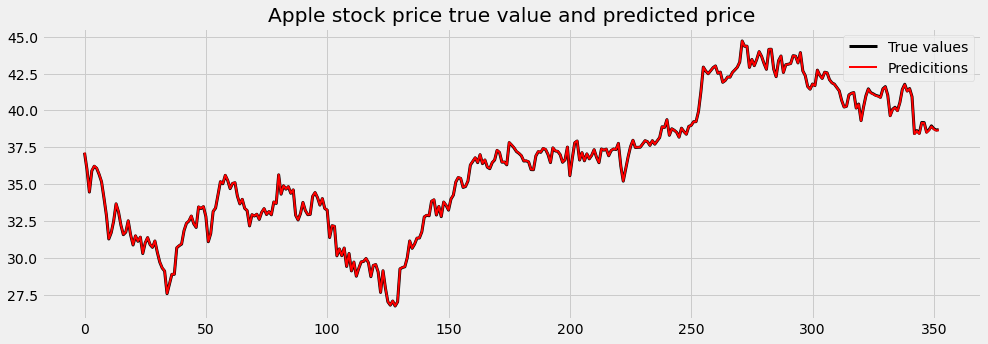

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ml_predic["Ridge"], color='k', lw=3)
ax.plot(ml_predic["y_true"], color='r', lw=2)
ax.legend(['True values', 'Predicitions'])
plt.title('Apple stock price true value and predicted price')
plt.show()


In [ ]:
#EDA BY BOLU AND BOLD CURVE FOR VOLATALITY
#NYSE Fundamentals Analysis and K-Means clustering in kaggle
